# Ex_2 Machine Leraning Asaf benor

# Import libraries and files

In [20]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import scipy.special


# Load the MNIST .mat file
mnist_dataset = scipy.io.loadmat('mnist_all.mat')

**Sigmoid fuction:**
    $$
    \begin{align}
    g(z) &= \frac{1}{1 + e^{-z}}\\
    p(y_j=1 | \mathrm{x_j}; \mathrm{w}) &= g(\mathrm{w}^T\mathrm{x_j})\\
    p(y_j=0 | \mathrm{x_j}; \mathrm{w}) &= 1 - g(\mathrm{w}^T\mathrm{x_j})
    \end{align}
    $$

In [21]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

**Cost function:** 
    $$
    \begin{align}
    l((X,Y);\mathrm{w}) &= -\frac{1}{n}\sum_{j=1}^{j=n} log~p(y_j | \mathrm{x_j}; \mathrm{w})\\
    \end{align}
    $$
    
**2.**
    
**Gradient calculation:**
$$
\frac{\partial l(w)}{\partial w} = \frac{1}{N} \sum_{t=1}^{N} (y_t - g(w {x}_t)) \cdot \stackrel{\rightarrow}{x}_t\\
p(y|x) = g(wx)^y \cdot (1 - g(wx))^{(1-y)}\\
l(w) = \frac{1}{N} \sum_{t=1}^{N} \log(g(wx)^y \cdot (1 - g(wx))^{(1-y)})\\
l(w) = \frac{1}{N} \sum_{t=1}^{N} y_t \log(g(wx)) + (1 - y_t) \log(1 - g(wx))\\
\frac{\partial l(w)}{\partial w} = \frac{1}{N} \sum_{t=1}^{N} \left( y_t \frac{g'(wx)}{g(wx)}x_t - (1 - y_t) \frac{g'(wx)}{1 - g(wx)}x_t \right)\\
\frac{\partial l(w)}{\partial w} = \frac{1}{N} \sum_{t=1}^{N} \left( y_t \frac{g(wx_t)(1 - g(wx_t))}{g(wx_t)}x_t - (1 - y_t) \frac{g(wx_t)(1 - g(wx_t))}{1 - g(wx_t)}x_t \right)\\
\frac{\partial l(w)}{\partial w} = \frac{1}{N} \sum_{t=1}^{N} x_t y_t (1 - g(w x_t)) - (1 - y_t) x_t g(w x_t)\\
\frac{\partial l(w)}{\partial w} = \frac{1}{N} \sum_{t=1}^{N} (y_t - g(w {x}_t)) \cdot \stackrel{\rightarrow}{x}_t\\
$$

**1.**

**g'(z) = g(z)(1-g(z)):**
    $$
    \begin{align}
    g(z) &= \frac{1}{1 + e^{-z}}\\
    g'(z) &= \frac{e^{-z}}{1 + e^{-z}}\\
    g(z)(1-g(z)) &= \frac{1}{{1+e^{-z}}} \cdot \left(1 - \frac{1}{{1+e^{-z}}}\right) = \frac{1}{{1+e^{-z}}} \cdot \left( \frac{1+e^{-z}-1}{{1+e^{-z}}}\right) = \frac{e^{-z}}{1 + e^{-z}}\\
    g'(z) &= g(z)(1-g(z))
    \end{align}
    $$



#  Download the attached data.
 Visualize some of the feature vectors, using reshape((28,28)) and be
 sure you understand the data.
 Train a binary Logistic Regression algorithm using the Gradient As
cent method described above. Train the machine to distinguish be
tween the digits 1 & 2.

## Visualize some of the feature vectors

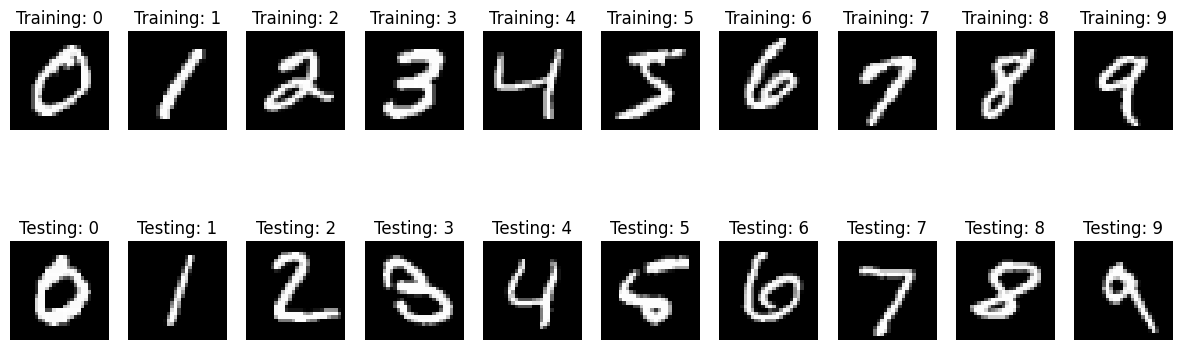

In [22]:
# Assuming mnist_dataset is preloaded with 'train0', 'train1', ..., 'test0', 'test1', ...

# Initialize matrices to hold reshaped images for both training and testing datasets
train_images_matrix = np.zeros((10, 28, 28))
test_images_matrix = np.zeros((10, 28, 28))

# Iterate over digits from 0 to 9
for num in range(10):
    # Retrieve training and testing data for the current digit
    training_data_for_digit = mnist_dataset['train' + str(num)]
    testing_data_for_digit = mnist_dataset['test' + str(num)]
    
    # Reshape the first instance of training and testing data into 28x28 format
    reshaped_train_image = np.reshape(training_data_for_digit[0, :], (28, 28))
    reshaped_test_image = np.reshape(testing_data_for_digit[0, :], (28, 28))
    
    # Populate the reshaped images into predefined matrices
    train_images_matrix[num] = reshaped_train_image
    test_images_matrix[num] = reshaped_test_image

# Visualize the reshaped images from the training dataset
plt.figure(figsize=(15, 5))
for num in range(10):
    plt.subplot(2, 10, num + 1)
    plt.imshow(train_images_matrix[num], cmap='gray')
    plt.title(f'Training: {num}')
    plt.axis('off')

# Visualize the reshaped images from the testing dataset
    plt.subplot(2, 10, num + 11)
    plt.imshow(test_images_matrix[num], cmap='gray')
    plt.title(f'Testing: {num}')
    plt.axis('off')

plt.show()



## Binary logistic regression model

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming mnist_data is preloaded with datasets like 'train0', 'train1', ..., 'test0', 'test1', ...

# Define dimensions for weight vector and count samples in datasets
weight_vector_length = mnist_data['test0'].shape[1]
training_samples_digit_1 = mnist_data['train1'].shape[0]
training_samples_digit_2 = mnist_data['train2'].shape[0]
testing_samples_digit_1 = mnist_data['test1'].shape[0]
testing_samples_digit_2 = mnist_data['test2'].shape[0]
total_training_samples = training_samples_digit_1 + training_samples_digit_2
total_testing_samples = testing_samples_digit_1 + testing_samples_digit_2

iterations = 300  # Total iterations for Logistic Regression
epsilon = 1e-7  # Small constant to prevent log(0)

initial_weights = np.random.rand(weight_vector_length) * 0.0005  # Initial weights with small random values
step_size = 0.0001  # Learning rate
loss_history = np.zeros(iterations)  # Track loss per iteration

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Main loop for Logistic Regression
for iteration in range(iterations):
    gradient_accumulator = np.zeros(weight_vector_length)  # Reset gradient accumulator

    # Process training data for digit 1
    X_train_1 = mnist_data['train1'].astype(float)
    weighted_sum_1 = X_train_1 @ initial_weights
    sigmoid_output_1 = sigmoid(weighted_sum_1)  # Apply sigmoid
    gradient_accumulator += np.sum((0 - sigmoid_output_1).reshape(-1, 1) * X_train_1, axis=0)

    # Process training data for digit 2
    X_train_2 = mnist_data['train2'].astype(float)
    weighted_sum_2 = X_train_2 @ initial_weights
    sigmoid_output_2 = sigmoid(weighted_sum_2)  # Apply sigmoid
    gradient_accumulator += np.sum((1 - sigmoid_output_2).reshape(-1, 1) * X_train_2, axis=0)

    # Update weights
    initial_weights += step_size * gradient_accumulator / total_training_samples
    # Compute and store loss with epsilon added to prevent divide by zero errors
    loss_history[iteration] = (np.sum(np.log(sigmoid_output_2 + epsilon)) + np.sum(np.log(1 - sigmoid_output_1 + epsilon))) / total_training_samples

# Evaluate model on test data
X_test_1 = mnist_data['test1'].astype(float)
weighted_test_sum_1 = X_test_1 @ initial_weights
predicted_prob_1 = sigmoid(weighted_test_sum_1)
misclassifications_1 = np.sum(predicted_prob_1 >= 0.5)

X_test_2 = mnist_data['test2'].astype(float)
weighted_test_sum_2 = X_test_2 @ initial_weights
predicted_prob_2 = sigmoid(weighted_test_sum_2)
misclassifications_2 = np.sum(predicted_prob_2 < 0.5)

# Calculate total errors and accuracy
total_errors = misclassifications_1 + misclassifications_2
accuracy_rate = (1 - (total_errors / total_testing_samples)) * 100

print(f'Total Errors: {total_errors}')
print(f'Accuracy Rate: {accuracy_rate}%')


Total Errors: 14
Accuracy Rate: 99.35394554683896%


# Print the Cost Function lw at each iteration of the optimization pro
cedure and verify it increases.
 What is the Sucsses Rate you achieved?

## Conclusion

Observing the trend in the Cost Function 
l(w), it becomes evident that beyond a specific point in the optimization process, the cost progressively ascends with each iteration. Additionally, the count of errors and the corresponding success rate are presented beneath the graph, providing a clear measure of the model's performance (below the graphe):

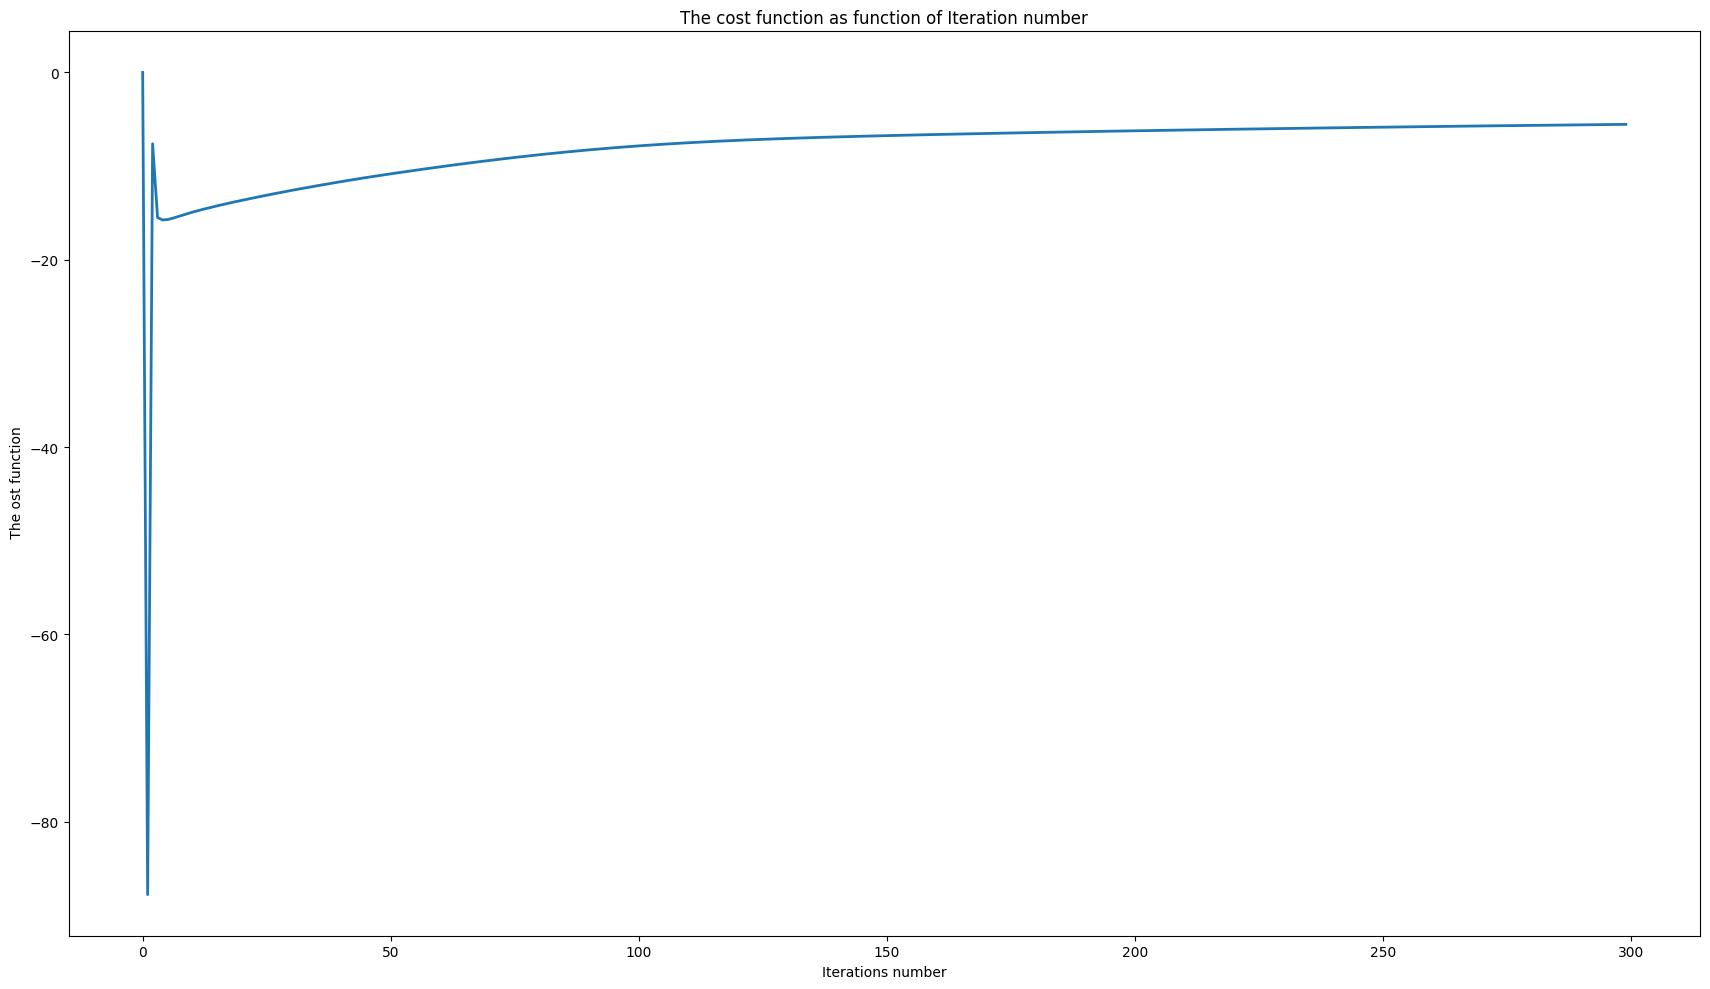

Number of mistakes: 15 from 2167 samples,The success Rate: 99.30779880018459%


In [24]:
# Plotting the Cost Function
plt.figure(figsize=(17.2, 10))
plt.plot(Cost_array, linewidth=2)
plt.title('The cost function as function of Iteration number')
plt.xlabel('Iterations number')
plt.ylabel(' The ost function')
plt.tight_layout()
plt.show()

print(f'Number of mistakes: {Mistakes} from {num_of_test_samples} samples,The success Rate: {SuccessRate}%')
